In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/olist-public-dataset/olist_public_dataset_v2.csv
/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


In [26]:
# To consider Brazilian calendar and hollidays
!pip install workalendar
from workalendar.america import Brazil
cal = Brazil()

In [27]:
df=pd.read_csv('../input/olist-public-dataset/olist_public_dataset_v2.csv')
df.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01.000000,2017-02-01 02:41:21.549551,2017-03-15 00:00:00.000000,2017-02-06 11:04:24.154259,...,51,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00
1,59af46052a799e80e2f0c665c587731d,delivered,15.00,15.10,1,1,2017-09-09 19:52:54.000000,2017-09-10 20:03:31.535281,2017-10-02 00:00:00.000000,2017-09-13 20:17:41.296915,...,44,1428,2,ae5cad88462eb7b7b61401e31c45618e,59af46052a799e80e2f0c665c587731d,5,NaN,entrega em 2 dias produto c boa qualidade otim...,2017-09-14 00:00:00.000000,2017-09-15 03:43:47+00:00
2,a3e6136894621db402a772c6bc72a12a,delivered,238.90,18.00,1,1,2017-01-30 17:00:09.000000,2017-01-30 17:31:25.438253,2017-03-07 00:00:00.000000,2017-02-06 15:43:04.758566,...,55,637,1,0c9ff9d8ed9b9bdd825487b3a66e05f5,a3e6136894621db402a772c6bc72a12a,5,NaN,produto veio antes do prazo informado muito ob...,2017-02-07 00:00:00.000000,2017-02-10 14:18:53+00:00
3,b675ea5a618922f6e679e30531b8957b,delivered,29.99,18.23,1,1,2018-03-11 18:18:36.000000,2018-03-11 18:30:37.931962,2018-04-03 00:00:00.000000,2018-04-03 20:36:43.778451,...,55,617,1,ad0a798e7941f3a5a2fb8139cb62ad78,b675ea5a618922f6e679e30531b8957b,4,NaN,NaN,2018-04-04 00:00:00.000000,2018-04-05 02:52:31+00:00
4,195a8be6794c487fe6cfbb97b7c61902,delivered,295.99,47.65,1,1,2017-04-20 08:01:08.000000,2017-04-25 08:05:40.405383,2017-05-24 00:00:00.000000,2017-05-04 18:47:45.721758,...,49,558,2,eaf2046d4c87809247a30050ea13df03,195a8be6794c487fe6cfbb97b7c61902,5,NaN,NaN,2017-05-05 00:00:00.000000,2017-05-08 15:20:18+00:00


In [28]:
df['order_purchase_timestamp']=pd.to_datetime(df.order_purchase_timestamp)
df['order_aproved_at']=pd.to_datetime(df.order_aproved_at).dt.date
df['order_estimated_delivery_date']=pd.to_datetime(df.order_estimated_delivery_date).dt.date
df['order_delivered_customer_date']=pd.to_datetime(df.order_delivered_customer_date).dt.date
df.product_category_name

0                  beleza_saude
1        informatica_acessorios
2                    automotivo
3               cama_mesa_banho
4              moveis_decoracao
                  ...          
99995        ferramentas_jardim
99996                 telefonia
99997             esporte_lazer
99998                cool_stuff
99999          moveis_decoracao
Name: product_category_name, Length: 100000, dtype: object

In [29]:
trans=pd.read_csv('../input/brazilian-ecommerce/product_category_name_translation.csv')
trans.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [30]:
df=df.merge(trans,on='product_category_name').drop('product_category_name',axis=1)
df.head()

,order_id,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,...,product_description_lenght,product_photos_qty,product_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,b95df3cef5297e79ef709ba256518f6f,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01,2017-03-15,2017-02-06,...,625,1,6cdd53843498f92890544667809f1595,b95df3cef5297e79ef709ba256518f6f,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,health_beauty
1,e98077a0d199a25a40eab3b14cc230d4,delivered,39.99,15.23,1,2,2018-04-17 13:25:36,2018-04-18,2018-05-10,2018-04-27,...,405,2,190d9562bfbe9d3ed876c2ac6f2f5894,e98077a0d199a25a40eab3b14cc230d4,5,NaN,NaN,2018-04-28 00:00:00.000000,2018-04-29 21:07:53+00:00,health_beauty
2,8a723730400b508cbf47fbef4a76ec8e,delivered,60.00,20.91,1,1,2018-02-18 12:41:01,2018-02-18,2018-03-14,2018-03-03,...,1665,1,5858f45c20fde7d7e49af37a2166635a,8a723730400b508cbf47fbef4a76ec8e,5,NaN,muito bom cabelo fica lisinho,2018-03-04 00:00:00.000000,2018-03-07 02:53:50+00:00,health_beauty
3,cf71b9b6b7ed12d72f541b0420023f19,delivered,79.99,10.94,1,1,2018-05-09 23:33:28,2018-05-11,2018-05-24,2018-05-17,...,492,3,2b4609f8948be18874494203496bc318,cf71b9b6b7ed12d72f541b0420023f19,4,Bom,gostei,2018-05-18 00:00:00.000000,2018-05-20 19:47:57+00:00,health_beauty
4,93ef9253c47e7dfc633c01f728488cb1,delivered,58.99,11.73,1,1,2017-10-26 09:07:04,2017-10-27,2017-11-09,2017-10-31,...,492,2,7c1bd920dbdf22470b68bde975dd3ccf,93ef9253c47e7dfc633c01f728488cb1,4,NaN,NaN,2017-11-01 00:00:00.000000,2017-11-03 20:37:36+00:00,health_beauty


In [31]:
df[['order_status', 'order_products_value',
       'order_freight_value', 'order_items_qty', 'order_sellers_qty',
       'order_purchase_timestamp', 'order_aproved_at',
       'order_estimated_delivery_date', 'order_delivered_customer_date', 'customer_city', 'customer_state',
       'customer_zip_code_prefix', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name_english']].head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_city,...,product_name_lenght,product_description_lenght,product_photos_qty,product_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01,2017-03-15,2017-02-06,Guaratuba,...,51,625,1,6cdd53843498f92890544667809f1595,5,NaN,NaN,2017-02-07 00:00:00.000000,2017-02-09 02:37:37+00:00,health_beauty
1,delivered,39.99,15.23,1,2,2018-04-17 13:25:36,2018-04-18,2018-05-10,2018-04-27,BRASILIA,...,51,405,2,190d9562bfbe9d3ed876c2ac6f2f5894,5,NaN,NaN,2018-04-28 00:00:00.000000,2018-04-29 21:07:53+00:00,health_beauty
2,delivered,60.00,20.91,1,1,2018-02-18 12:41:01,2018-02-18,2018-03-14,2018-03-03,Belo Horizonte,...,38,1665,1,5858f45c20fde7d7e49af37a2166635a,5,NaN,muito bom cabelo fica lisinho,2018-03-04 00:00:00.000000,2018-03-07 02:53:50+00:00,health_beauty
3,delivered,79.99,10.94,1,1,2018-05-09 23:33:28,2018-05-11,2018-05-24,2018-05-17,Cachoeiro de Itapemirim,...,59,492,3,2b4609f8948be18874494203496bc318,4,Bom,gostei,2018-05-18 00:00:00.000000,2018-05-20 19:47:57+00:00,health_beauty
4,delivered,58.99,11.73,1,1,2017-10-26 09:07:04,2017-10-27,2017-11-09,2017-10-31,Maua,...,59,492,2,7c1bd920dbdf22470b68bde975dd3ccf,4,NaN,NaN,2017-11-01 00:00:00.000000,2017-11-03 20:37:36+00:00,health_beauty


In [32]:
df.review_score.value_counts().sort_index()

1    11905
2     3412
3     8743
4    19247
5    56693
Name: review_score, dtype: int64

In [33]:
orders = df[['order_status', 'order_products_value',
                 'order_freight_value', 'order_items_qty', 'order_sellers_qty',
                 'order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 
                 'order_delivered_customer_date', 'customer_state', 
                 'product_category_name_english', 'product_name_lenght', 'product_description_lenght', 
                 'product_photos_qty', 'review_score']]

In [34]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_status                   100000 non-null  object        
 1   order_products_value           100000 non-null  float64       
 2   order_freight_value            100000 non-null  float64       
 3   order_items_qty                100000 non-null  int64         
 4   order_sellers_qty              100000 non-null  int64         
 5   order_purchase_timestamp       100000 non-null  datetime64[ns]
 6   order_aproved_at               99982 non-null   object        
 7   order_estimated_delivery_date  100000 non-null  object        
 8   order_delivered_customer_date  97595 non-null   object        
 9   customer_state                 100000 non-null  object        
 10  product_category_name_english  100000 non-null  object        
 11  p

In [35]:
orders

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,review_score
0,delivered,349.90,13.84,1,1,2017-01-31 17:19:01,2017-02-01,2017-03-15,2017-02-06,PR,health_beauty,51,625,1,5
1,delivered,39.99,15.23,1,2,2018-04-17 13:25:36,2018-04-18,2018-05-10,2018-04-27,DF,health_beauty,51,405,2,5
2,delivered,60.00,20.91,1,1,2018-02-18 12:41:01,2018-02-18,2018-03-14,2018-03-03,MG,health_beauty,38,1665,1,5
3,delivered,79.99,10.94,1,1,2018-05-09 23:33:28,2018-05-11,2018-05-24,2018-05-17,ES,health_beauty,59,492,3,4
4,delivered,58.99,11.73,1,1,2017-10-26 09:07:04,2017-10-27,2017-11-09,2017-10-31,SP,health_beauty,59,492,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,delivered,39.99,10.15,1,2,2018-03-07 17:42:06,2018-03-07,2018-04-02,2018-03-15,SP,fashion_childrens_clothes,38,168,1,5
99996,delivered,110.00,8.96,1,1,2018-01-24 12:14:45,2018-01-24,2018-02-08,2018-01-29,SP,fashion_childrens_clothes,48,488,5,5
99997,canceled,49.90,15.10,1,1,2017-08-06 14:32:19,2017-08-06,2017-08-31,NaT,PR,fashion_childrens_clothes,42,277,3,1
99998,delivered,100.00,15.45,1,1,2017-09-17 16:51:43,2017-09-19,2017-10-11,2017-09-28,DF,security_and_services,48,461,4,1


In [36]:
round((orders['review_score'].value_counts() / len(orders['review_score']))*100).sort_index()

1    12.0
2     3.0
3     9.0
4    19.0
5    57.0
Name: review_score, dtype: float64

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

strat=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_i,test_i in strat.split(orders,orders['review_score']):
    strat_train=orders.loc[train_i]
    strat_test=orders.loc[test_i]

<AxesSubplot:>

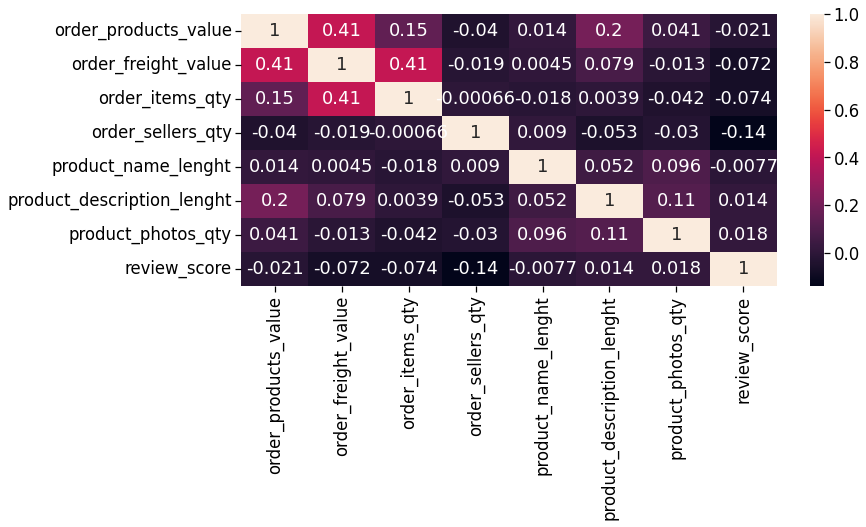

In [38]:
plt.subplots(figsize=(12,5))
sns.heatmap(strat_train.corr(),annot=True)

In [39]:
strat_train.head()

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,order_purchase_timestamp,order_aproved_at,order_estimated_delivery_date,order_delivered_customer_date,customer_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,review_score
41966,delivered,45.90,8.72,1,1,2017-10-09 18:00:12,2017-10-09,2017-10-20,2017-10-17,SP,sports_leisure,39,772,1,5
62325,delivered,45.00,17.25,1,1,2018-07-26 02:35:52,2018-07-27,2018-08-14,2018-08-16,BA,watches_gifts,56,660,3,5
7720,delivered,89.90,15.70,1,1,2018-06-21 13:18:11,2018-06-21,2018-07-23,2018-06-25,SP,health_beauty,49,819,3,5
24669,delivered,78.25,16.31,1,1,2017-09-28 22:52:48,2017-09-28,2017-10-25,2017-10-09,ES,bed_bath_table,41,174,1,4
33241,delivered,79.80,49.39,2,6,2017-10-23 14:18:27,2017-10-23,2017-11-13,2017-11-01,MG,furniture_decor,56,296,3,4


In [40]:
strat_train['order_aproved_at']

41966    2017-10-09
62325    2018-07-27
7720     2018-06-21
24669    2017-09-28
33241    2017-10-23
            ...    
9050     2017-03-21
93541    2018-04-27
82338    2017-07-22
25690    2017-09-18
97702    2017-06-25
Name: order_aproved_at, Length: 80000, dtype: object

In [41]:
sample=strat_train.copy()

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin

class AttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass    
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        df = X.copy()
        
        # Calculate the time between the actual and estimated delivery date. If negative was delivered early, if positive was delivered late.
        df['is_late'] = df.order_delivered_customer_date > df.order_estimated_delivery_date
        
        # Calculate the average product value.
        df['average_product_value'] = df.order_products_value / df.order_items_qty

        # Calculate the total order value
        df['total_order_value'] = df.order_products_value + df.order_freight_value
        
        # Calculate the order freight ratio.
        df['order_freight_ratio'] = df.order_freight_value / df.order_products_value
        
        # Calculate the order freight ratio.
        df['purchase_dayofweek'] = df.order_purchase_timestamp.dt.dayofweek
                       
        # With that we can remove the timestamps from the dataset
        cols2drop = ['order_purchase_timestamp', 'order_aproved_at', 'order_estimated_delivery_date', 
                     'order_delivered_customer_date']
        df.drop(cols2drop, axis=1, inplace=True)
        
        return df

In [43]:
attr_adder = AttributesAdder()
feat_eng = attr_adder.transform(strat_train)
feat_eng.head(3)

,order_status,order_products_value,order_freight_value,order_items_qty,order_sellers_qty,customer_state,product_category_name_english,product_name_lenght,product_description_lenght,product_photos_qty,review_score,is_late,average_product_value,total_order_value,order_freight_ratio,purchase_dayofweek
41966,delivered,45.9,8.72,1,1,SP,sports_leisure,39,772,1,5,False,45.9,54.62,0.189978,0
62325,delivered,45.0,17.25,1,1,BA,watches_gifts,56,660,3,5,True,45.0,62.25,0.383333,3
7720,delivered,89.9,15.70,1,1,SP,health_beauty,49,819,3,5,False,89.9,105.60,0.174638,3


In [44]:
corr_matrix = feat_eng.corr()
corr_matrix['review_score'].sort_values(ascending=False)

review_score                  1.000000
product_photos_qty            0.017596
product_description_lenght    0.014032
average_product_value        -0.003409
purchase_dayofweek           -0.006675
product_name_lenght          -0.007707
order_products_value         -0.020501
order_freight_ratio          -0.023914
total_order_value            -0.026802
order_freight_value          -0.071941
order_items_qty              -0.073601
order_sellers_qty            -0.137920
is_late                      -0.338739
Name: review_score, dtype: float64

In [45]:
feat_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 41966 to 97702
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_status                   80000 non-null  object 
 1   order_products_value           80000 non-null  float64
 2   order_freight_value            80000 non-null  float64
 3   order_items_qty                80000 non-null  int64  
 4   order_sellers_qty              80000 non-null  int64  
 5   customer_state                 80000 non-null  object 
 6   product_category_name_english  80000 non-null  object 
 7   product_name_lenght            80000 non-null  int64  
 8   product_description_lenght     80000 non-null  int64  
 9   product_photos_qty             80000 non-null  int64  
 10  review_score                   80000 non-null  int64  
 11  is_late                        80000 non-null  bool   
 12  average_product_value          80000 non-n

In [46]:
orders_features = strat_train.drop('review_score', axis=1)
orders_labels = strat_train['review_score'].copy()

In [47]:
orders_features_test=strat_test.drop('review_score',axis=1)
orders_labels_test=strat_test['review_score'].copy()

In [48]:
cat_attribs = ['order_status', 'customer_state', 'product_category_name_english']
num_attribs = orders_features.drop(cat_attribs, axis=1).columns

In [49]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attribute_names]

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# for now we wont work with categorical data. Planning to add it on next releases
num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('attribs_adder', AttributesAdder()),
                         ('std_scaller', StandardScaler())
                        ])

In [51]:
orders_features_prepared = num_pipeline.fit_transform(orders_features)
orders_features_prepared

array([[-0.42864476, -0.64029152, -0.21753729, ..., -0.47356485,
        -0.37769827, -1.40790805],
       [-0.43329345, -0.221773  , -0.21753729, ..., -0.43594081,
         0.27782067,  0.11674387],
       [-0.20137565, -0.29782267, -0.21753729, ..., -0.22217906,
        -0.42970352,  0.11674387],
       ...,
       [-0.29476259,  0.79876456, -0.21753729, ..., -0.2011234 ,
         0.77436568,  1.13317848],
       [-0.14972358, -0.07261751, -0.21753729, ..., -0.15023479,
        -0.33320183, -1.40790805],
       [-0.40798393, -0.1864467 , -0.21753729, ..., -0.40822822,
         0.19912287,  1.64139579]])

In [52]:
orders_features_test=num_pipeline.transform(orders_features_test)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor()
forest_reg.fit(orders_features_prepared, orders_labels)

predictions = forest_reg.predict(orders_features_prepared)
forest_mse = mean_squared_error(orders_labels, predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.5703342046365739

In [54]:
forest_reg.score(orders_features_prepared,orders_labels)

0.8250587312284344

In [55]:
predictions1 = forest_reg.predict(orders_features_test)
forest_mse = mean_squared_error(orders_labels_test, predictions1)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

1.298640500876223

In [56]:
forest_reg.score(orders_features_test,orders_labels_test)

0.0929645427347896

In [57]:
some_data = orders_features.iloc[:8]
some_labels = orders_labels.iloc[:8]
some_data_prepared = num_pipeline.transform(some_data)

In [58]:
print('Predicted: {} \n Labels: {}'.format(list(forest_reg.predict(some_data_prepared)), list(some_labels.values)))

Predicted: [4.488583333333334, 3.84, 4.538952380952382, 4.17, 3.76, 4.63, 1.14, 1.8619999999999999] 
 Labels: [5, 5, 5, 4, 4, 5, 1, 1]
